# CARGA DE DATASET

In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
DATOS_TRAIN = pd.read_csv('C:/Users/agust/DeepLearningCourse/Fashion_MNIST/fashion-mnist_train.csv')
DATOS_TEST = pd.read_csv('C:/Users/agust/DeepLearningCourse/Fashion_MNIST/fashion-mnist_test.csv')

In [8]:
DATOS_TRAIN.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
Train_Array = DATOS_TRAIN.to_numpy().astype(int)
Test_Array = DATOS_TEST.to_numpy().astype(int)

In [46]:
Train_Array.shape, Test_Array.shape

((60000, 785), (10000, 785))

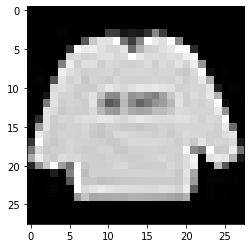

In [36]:
# Visualizamos la primer imagen del train dataset (remuevo la primer columna que es el target)

img = Train_Array[:1,1:].reshape(28,28)

plt.imshow(img, cmap='gray')

# Separo los dataset en train test y target

In [48]:
X_train = Train_Array[:,1:]
X_train.shape

(60000, 784)

In [51]:
y_train = Train_Array[:,:1]
y_train.shape

(60000, 1)

In [54]:
X_test = Test_Array[:,1:]
X_test.shape

(10000, 784)

In [56]:
y_test = Test_Array[:,:1]
y_test.shape

(10000, 1)

# Solucion Utilizando Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
gnb = GaussianNB()

In [79]:
y_pred = gnb.fit(X_train, np.ravel(y_train)).predict(X_test) #np.ravel lo use sino da error
#np.ravel is used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

In [76]:
print("Number of mislabeled points out of a total %d points : %d"
    % (X_test.shape[0], (np.ravel(y_test) != np.ravel(y_pred)).sum()))

Number of mislabeled points out of a total 10000 points : 4086


In [78]:
# Accuracy
gnb.score(X_test, np.ravel(y_test))

0.5914

In [90]:
# Medias
print(gnb.theta_.shape)
# varianzas (desvios)
print(gnb.var_.shape)
print('cantidad de parametros aprendidos:', np.product(gnb.theta_.shape) 
      + np.product(gnb.sigma_.shape))

(10, 784)
(10, 784)
cantidad de parametros aprendidos: 15680


In [86]:
np.ravel(y_pred)[10]

3

In [87]:
np.ravel(y_test)[10]

3

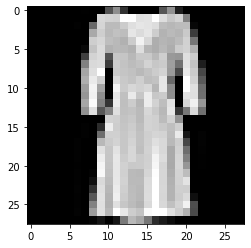

In [88]:
# Visualizamos la primer imagen del train dataset (remuevo la primer columna que es el target)

img = X_test[10:11,:].reshape(28,28)

plt.imshow(img, cmap='gray')

# Solucion con TensorFlow

Guiado por codigo publicado en https://www.kaggle.com/code/ayushrathi47/fashion-mnist-with-tensorflow

In [92]:
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl (438.0 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (

In [94]:
import pandas as pd 
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,accuracy_score, ConfusionMatrixDisplay

In [131]:
train_data = X_train.reshape(X_train.shape[0],28,28)
test_data = X_test.reshape(X_test.shape[0],28,28)

train_labels = np.array(DATOS_TRAIN.label)
test_labels = np.array(DATOS_TEST.label)

labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [128]:
train_data.shape

(60000, 28, 28)

In [132]:
train_labels.shape

(60000,)

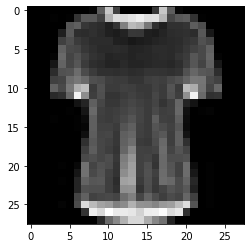

In [120]:
plt.imshow(train_data[1500], cmap='gray') # ploteo una imagen cualquiera para chequear que este todo bien

In [121]:
# Normalizing the values 
train_data = X_train/255
test_data = X_test/255

### Building a Multi-class classification model through TensorFlow

In [149]:
tf.random.set_seed(50) # setting random seed 

model = Sequential() # ceating the model 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu')) # any range for number of neurons between 5 to 10 is good, my model is overkill
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='Softmax',name= "Output_layer"))

model.compile(loss='sparse_categorical_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [150]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 25)                1275      
                                                                 
 Output_layer (Dense)        (None, 10)                260       
                                                                 
Total params: 85,085
Trainable params: 85,085
Non-trainable params: 0
_________________________________________________________________


In [151]:
#fitting model / Training our modell
history = model.fit(train_data, train_labels, validation_data=(test_data,test_labels), epochs=25)
#aca estoy usando el test set como datos de validacion

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6417 - accuracy: 0.7408 - val_loss: 0.6007 - val_accuracy: 0.8036
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5372 - accuracy: 0.8147 - val_loss: 0.5294 - val_accuracy: 0.8131
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4702 - accuracy: 0.8337 - val_loss: 0.4439 - val_accuracy: 0.8448
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4428 - accuracy: 0.8436 - val_loss: 0.4486 - val_accuracy: 0.8464
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4143 - accuracy: 0.8504 - val_loss: 0.4017 - val_accuracy: 0.8522
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4043 - accuracy: 0.8562 - val_loss: 0.4360 - val_accuracy: 0.8473
Epoch 7/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3870 - accuracy: 0.8592 - val_loss: 0.3985 - val_accuracy:

<AxesSubplot:>

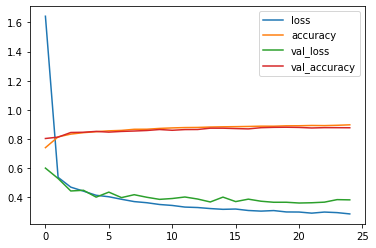

In [152]:
# Visualizing loss and accuracy of our model
pd.DataFrame(history.history).plot()

### Prediciendo y validdando el modelo 

In [153]:
pred = model.predict(test_data) # inputs probability for each label
pred = pred.argmax(axis=1) # takes the label value with highest probability 

In [154]:
accuracy =accuracy_score(pred,test_labels)
print("Accuracy: ",accuracy*100,'%')

Accuracy:  87.72999999999999 %


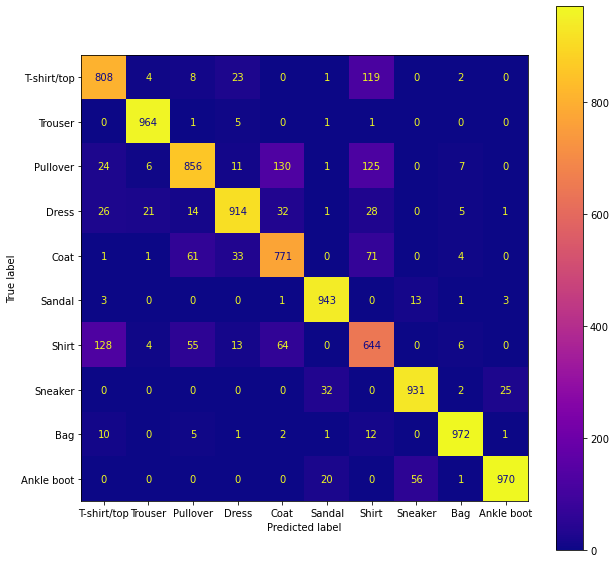

In [155]:
# Creating Confusion matrix
cm=confusion_matrix(pred ,test_labels)
# Ploting Confusion matrix 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'plasma');